<a href="https://colab.research.google.com/github/saraswathykrk/ml_projects/blob/main/Car_Sales/CarSales_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
car = pd.read_csv("https://raw.githubusercontent.com/saraswathykrk/ml_projects/main/Car_Sales/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [29]:
car.shape

(156, 16)

In [30]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [31]:
total = car.isnull().sum().sort_values(ascending=False)
percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
miss = print(missing_data)
miss

                    Total   Percent
Sales_in_thousands      5  0.032051
Manufacturer            0  0.000000
Model                   0  0.000000
_year_resale_value      0  0.000000
Vehicle_type            0  0.000000
Price_in_thousands      0  0.000000
Engine_size             0  0.000000
Horsepower              0  0.000000
Wheelbase               0  0.000000
Width                   0  0.000000
Length                  0  0.000000
Curb_weight             0  0.000000
Fuel_capacity           0  0.000000
Fuel_efficiency         0  0.000000
Latest_Launch           0  0.000000
Power_perf_factor       0  0.000000


In [32]:
#Impute the missing value using "median" groupby Manufacturer.
car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
car.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [33]:
#Creating a dummy variable for "Vehicle_type" and drop the original variable
# car_dummy =pd.DataFrame()
car_dummy = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
car_dummy

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Passenger
0,Acura,Integra,16.919,16.360000,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,1
1,Acura,TL,39.384,19.875000,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,1
2,Acura,CL,14.114,18.225000,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,1
3,Acura,RL,8.588,29.725000,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,1
4,Audi,A4,20.397,22.255000,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Volvo,V40,3.545,18.072975,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,9/21/2011,66.498812,1
152,Volvo,S70,15.245,18.072975,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,11/24/2012,70.654495,1
153,Volvo,V70,17.531,18.072975,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,6/25/2011,71.155978,1
154,Volvo,C70,3.493,18.072975,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,4/26/2011,101.623357,1


In [34]:
car_drop = car_dummy.drop(car_dummy[['Manufacturer', 'Model', 'Latest_Launch']], axis=1)
car_dummy = car_drop
car_dummy

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360000,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,1
1,39.384,19.875000,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,1
2,14.114,18.225000,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000,1
3,8.588,29.725000,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779,1
4,20.397,22.255000,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3.545,18.072975,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,66.498812,1
152,15.245,18.072975,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,70.654495,1
153,17.531,18.072975,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,71.155978,1
154,3.493,18.072975,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,101.623357,1


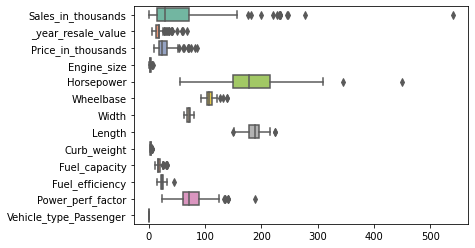

In [35]:
import seaborn as sns
sns.boxplot(data=car_dummy, orient="h", palette="Set2")

In [36]:
#Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.
Q1 = car_dummy.quantile(0.05)
Q3 = car_dummy.quantile(0.95)
Q_diff = Q3 - Q1
car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
car_out

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360000,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,1
1,39.384,19.875000,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,1
2,14.114,18.225000,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000,1
3,8.588,29.725000,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779,1
4,20.397,22.255000,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,3.545,18.072975,24.40,1.9,160,100.5,67.6,176.6,3.042,15.8,25,66.498812,1
152,15.245,18.072975,27.50,2.4,168,104.9,69.3,185.9,3.208,17.9,25,70.654495,1
153,17.531,18.072975,28.80,2.4,168,104.9,69.3,186.2,3.259,17.9,25,71.155978,1
154,3.493,18.072975,45.50,2.3,236,104.9,71.5,185.7,3.601,18.5,23,101.623357,1


In [37]:
from sklearn.preprocessing import StandardScaler
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def lr(car_modify):
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std[1])

[ 0.18033873  0.07005147  0.13358557  0.69094938  0.08045672 -0.24703626
  0.41500948  0.21770203 -0.19402264  0.27500229  0.56959669  0.58722022]


In [38]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)
cars

,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,-0.169601,-0.413822,-1.210889,-0.812988,-0.825439,-1.118929,-1.116140,-1.182214,-1.226164,0.982151,-0.753842,0.58722
1,0.180339,0.070051,0.133586,0.690949,0.080457,-0.247036,0.415009,0.217702,-0.194023,0.275002,0.569597,0.58722
2,0.016071,0.112127,0.133586,0.690949,-0.077090,-0.159847,0.347788,0.142763,-0.194023,0.510719,0.528571,0.58722
3,1.160966,1.023772,0.421687,0.425549,0.933837,0.072658,0.691363,0.748650,0.012406,-0.432146,0.570357,0.58722
4,0.417282,-0.239207,-1.210889,-0.636055,-0.641634,-0.857361,-0.697875,-0.609811,-0.400451,0.746435,-0.573968,0.58722
...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.000936,-0.210455,-1.114855,-0.459121,-0.917341,-1.031740,-0.802441,-0.539656,-0.555272,0.275002,-0.425142,0.58722
152,0.000936,0.006938,-0.634685,-0.317574,-0.339669,-0.537667,-0.107822,-0.274979,-0.013398,0.275002,-0.258938,0.58722
153,0.000936,0.098102,-0.634685,-0.317574,-0.339669,-0.537667,-0.085415,-0.193663,-0.013398,0.275002,-0.238882,0.58722
154,0.000936,1.269215,-0.730719,0.885577,-0.339669,0.101721,-0.122760,0.351635,0.141423,-0.196430,0.979642,0.58722


In [39]:
cars.corr()

,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
_year_resale_value,1.000000,0.822430,0.468813,0.696936,-0.047806,0.159591,0.023869,0.300296,0.275045,-0.357338,0.743218,0.079427
Price_in_thousands,0.822430,1.000000,0.626910,0.838916,0.110451,0.328980,0.157119,0.527875,0.423073,-0.490249,0.897482,0.044519
Engine_size,0.468813,0.626910,1.000000,0.837360,0.472130,0.690398,0.541424,0.759525,0.663022,-0.733832,0.818198,-0.258902
Horsepower,0.696936,0.838916,0.837360,1.000000,0.286308,0.539158,0.393364,0.610637,0.499907,-0.611512,0.992926,-0.004689
Wheelbase,-0.047806,0.110451,0.472130,0.286308,1.000000,0.683135,0.839639,0.651854,0.654044,-0.498075,0.258350,-0.388009
Width,0.159591,0.328980,0.690398,0.539158,0.683135,1.000000,0.710435,0.721515,0.656302,-0.601539,0.510976,-0.246183
Length,0.023869,0.157119,0.541424,0.393364,0.839639,0.710435,1.000000,0.628285,0.563540,-0.446256,0.354823,-0.135259
Curb_weight,0.300296,0.527875,0.759525,0.610637,0.651854,0.721515,0.628285,1.000000,0.863451,-0.818684,0.612533,-0.519300
Fuel_capacity,0.275045,0.423073,0.663022,0.499907,0.654044,0.656302,0.563540,0.863451,1.000000,-0.800857,0.500009,-0.597469
Fuel_efficiency,-0.357338,-0.490249,-0.733832,-0.611512,-0.498075,-0.601539,-0.446256,-0.818684,-0.800857,1.000000,-0.604887,0.572125


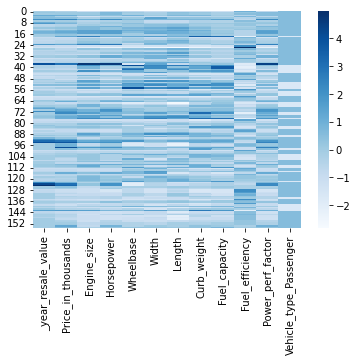

In [40]:
sns.heatmap(cars,cmap='Blues')

In [41]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
X

,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Passenger
0,-0.413822,-1.210889,-0.825439,0.982151,0.58722
1,0.070051,0.133586,0.080457,0.275002,0.58722
2,0.112127,0.133586,-0.077090,0.510719,0.58722
3,1.023772,0.421687,0.933837,-0.432146,0.58722
4,-0.239207,-1.210889,-0.641634,0.746435,0.58722
...,...,...,...,...,...
151,-0.210455,-1.114855,-0.917341,0.275002,0.58722
152,0.006938,-0.634685,-0.339669,0.275002,0.58722
153,0.098102,-0.634685,-0.339669,0.275002,0.58722
154,1.269215,-0.730719,-0.339669,-0.196430,0.58722


In [42]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(156, 5)


In [43]:
y = car_dummy['Sales_in_thousands']
y.head()

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64

In [44]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(156,)


Modelling

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(109, 5)
(109,)
(47, 5)
(47,)


In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [48]:
print('Intercept:',linreg.intercept_)                                            
print('Coefficients:',linreg.coef_)

Intercept: 54.13181576207786
Coefficients: [-47.39155816  23.9552675   26.18461633   7.42050911   1.45955044]


In [52]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
  print(c1,c2)

Intercept 54.13181576207786
Intercept -47.39155816175152
Price_in_thousands 23.955267496291327
Engine_size 26.184616331437937
Wheelbase 7.420509111016269
Fuel_efficiency 1.4595504410773223


In [53]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train) 
pred.columns = ['Sales']
pred.head()

,Sales
0,38.303910
1,53.464762
2,78.873722
3,68.770694
4,88.987056


In [55]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
pred_test.columns=['Sales']
pred_test.head()

,Sales
0,52.925538
1,53.576349
2,63.883763
3,74.179797
4,57.128084


In [56]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 42.949391239745964
MAE for test set is 47.822199851327994


In [57]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 4308.179496665399
MSE for test set is 4510.69604414173


In [58]:
import numpy as np
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 65.6367236892991
RMSE for test set is 67.1617156134485


In [59]:
from sklearn.metrics import r2_score
R2_train = r2_score(y_train, y_pred_train) 
R2_test = r2_score(y_test, y_pred_test) 
print('R2 for training set is {}'.format(R2_train))
print('R2 for test set is {}'.format(R2_test))

R2 for training set is 0.29078926391916815
R2 for test set is -0.027732086250533028
